# Plot Conditions Under which Groups Form

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
final_fig_path = "../CH_Manuscript/Figures/"
import sys
sys.path.insert(1, 'Functions')
from fitness_funs_non_dim import *
from sim_graph_funs import *
#from group_formation_funs_vectorized import *
#from group_formation_measures import *

In [32]:
params_base = dict(β1 = 8, β2 = 1, H1=2, H2=2, 
                   α1_of_1 = 0.05, α2_of_1 = 0.95, 
                   s1 = 2, s2 = 2, 
                   α2_fun_type = 'sigmoid', A = 0.5)
# black, blue, and red
colors_x = ['k', 'b', 'r', 'm']

In [35]:
def curve_x_group_forms(x,N1,N2,**params):
        # per capita fun responses
    # per capita fun responses
    W1_1 = (1/(x-1))*fun_f1(x-1,N1,N2,**params)  # per capita f_1 (x - 1)
    W1_2 = (1/x) * fun_f1(x,N1,N2,**params)      # per capita f_1(x)
    W2_1 = (1/(x-1))*fun_f2(x-1,N1,N2,**params)  # per capita f_2(x-1)
    W2_2 = (1/x)*fun_f2(x,N1,N2,**params)        # per capita f_2(x)

    denominator = W1_2 - W1_1
    if denominator > 0:
        numerator =  W2_1 - W2_2
        beta_ratio_curve = numerator / denominator
        return beta_ratio_curve
    else:
        return np.nan


In [30]:
N1_values = np.linspace(0.01, 1, 1000)

{'β1': 8, 'β2': 1, 'H1': 2, 'H2': 2, 'α1_of_1': 0.05, 'α2_of_1': 0.95, 's1': 2, 's2': 2, 'α2_fun_type': 'sigmoid', 'A': 0.5}


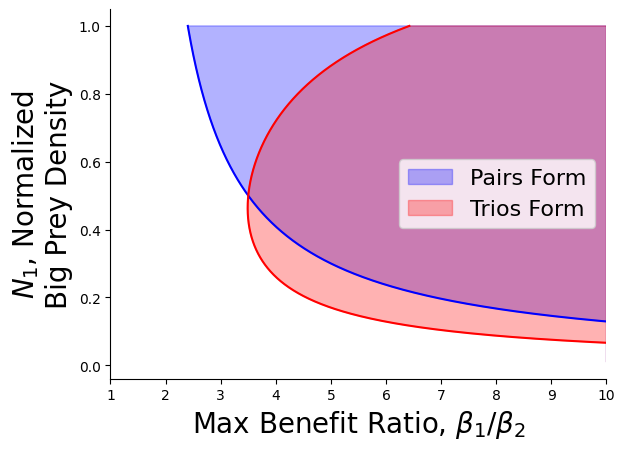

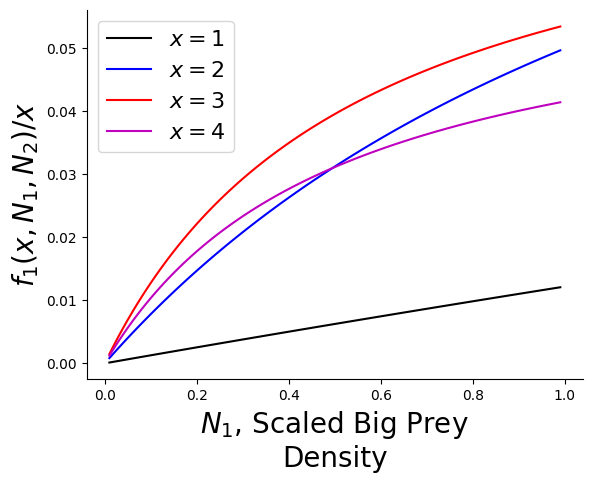

In [38]:

x_right = 10
#H = 10


# Define the range for N1
N1_values = np.linspace(0.01, 1, 1000)
N2 = 0.5  # Example value for N2
print(params_base)
# pairs form
b_ratio_pairs = np.array([curve_x_group_forms(2,N1, N2,**params_base.copy()) for N1 in N1_values])
b_ratio_trios = np.array([curve_x_group_forms(3,N1, N2,**params_base.copy()) for N1 in N1_values])

fig, ax = plt.subplots(1, 1)
# Plot curves
ax.plot(b_ratio_pairs, N1_values, color='b')
ax.plot(b_ratio_trios, N1_values, color='r')

# Fill regions

#ax.fill_betweenx(N1_values, b_ratio_pairs, 10, where=(b_ratio_trios > b_ratio_pairs), color='purple', alpha=0.3, label='Trios and Pairs Form')
ax.fill_betweenx(N1_values, b_ratio_pairs, x_right, color='blue', alpha=0.3, label='Pairs Form')
ax.fill_betweenx(N1_values, b_ratio_trios, x_right, color='red', alpha=0.3, label='Trios Form')


# Format the plot using the provided function
#format_ax(ax, r'Benefit of Big Prey, $\beta_1$', N1lab, if_legend=False, xlim = [1,10])
#fig.savefig(final_fig_path + 'N1_to_form_grps_beta1.png', bbox_inches = 'tight', dpi = 600)



format_ax(ax, r'Max Benefit Ratio, $\beta_1/\beta_2$', r'$N_1$,'+ ' Normalized\nBig Prey Density', 
          if_legend=True, xlim = [1,x_right])
fig.savefig(final_fig_path + '/N1_to_form_grps_beta_ratio.png', bbox_inches = 'tight', dpi = 600)



# now for comparison, the per capita kill fitness

fig, ax = plt.subplots(1,1)
N1=np.arange(0.01,1,0.01)
for i,x in enumerate([1,2,3,4]):
    ax.plot(N1, fun_f1(x,N1,N2,**params_base.copy())/x, c = colors_x[i], label = r'$x=$' + '%d'%x)
format_ax(ax,N1lab,r'$f_1(x,N_1,N_2)/x$', xlim = None, ylim=None,
              fs_labs = 20, fs_legend = 16, if_legend = True,
             ncol_legend = 1)
#fig.savefig(final_fig_path + 'pc_Fun_response_1_example_H10.png', bbox_inches = 'tight')

In [15]:
fun_f1(x,N1,N2,**params_base.copy())/x

np.float64(0.04158986175115207)